# Example using a standalone SOBOL sequence generator

Functions and Classes:
- SobolIterator: A class from the BO_Iterator module that generates a sequence of parameters using the Sobol method.
- SyntheticGaussian: A class from the BO_Iterator module that defines a synthetic Gaussian objective function.

Main Steps:
1. Define the objective function using SyntheticGaussian with specified centers, sigma, and number of samples.
2. Initialize the SobolIterator with parameter names, bounds, number of Sobol samples, and the objective function.
3. Iterate over the generated parameter sets, evaluate the objective function for each set, and record the results.
4. Retrieve all recorded data from the iterator.
5. Plot the Sobol parameters against the observed objective values using a scatter plot with a color bar indicating the objective values.

In [42]:
from BO_Iterator import SobolIterator, SyntheticGaussian
objective_function = SyntheticGaussian(centers=[0.5, 0.5], sigma=0.2, n_samples=1)

param_names = ["x0","x1"]
param_bounds = [(0,1),(0,1)]
iterator = SobolIterator(
    param_names=param_names,
    param_bounds=param_bounds,
    n_sobol=1000,
    objective_function=objective_function,
)

for param_dict in iterator:
    x0 = param_dict["x0"]
    x1 = param_dict["x1"]
    objective = iterator.evaluate_objective(param_dict)
    iterator.record_result(param_dict, objective)
data = iterator.get_all_data()

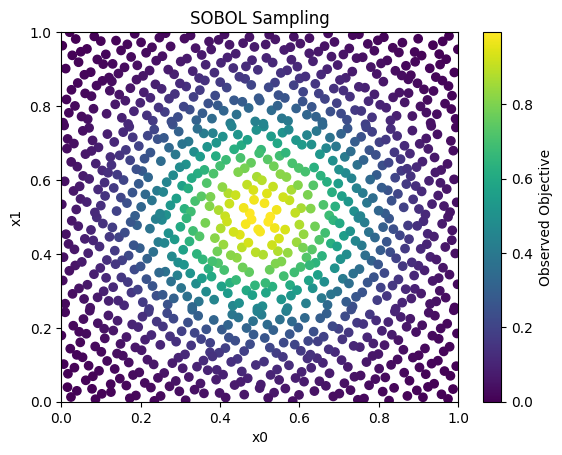

In [45]:
import matplotlib.pyplot as plt
import numpy as np

param_names = iterator.param_names
sobol_params = np.array([[d[name] for name in param_names] for d in data['sobol_params']])
observed_objective = [obj[0] for obj in data['observed_objective']]

scatter = plt.scatter(sobol_params[:,0], sobol_params[:,1], c=observed_objective)
cbar = plt.colorbar(scatter)
cbar.set_label('Observed Objective')

plt.xlabel('x0')
plt.ylabel('x1')
plt.title('SOBOL Sampling')

plt.xlim(param_bounds[0][0], param_bounds[0][1])
plt.ylim(param_bounds[1][0], param_bounds[1][1])
scatter.set_clim(0, max(observed_objective))

plt.show()